A proposta desse questionário foi feita pelo Dr. Valmir de Souza, professor, 
consultor de politicas sociais do Instituto Polis, membro do grupo de Políticas públicas de acesso a informação(GPOPAI/EACH/USP), membro da Rede Paulista de pesquisadores de Cultura, Diretor do SIMPRO Guarulhos.

Graduando: Edimar Ribeiro de Moura, primeiro periodo de Serviço Social pela Univeritas/Ung, presidente/coordenador do Centro de Reabilitação Cidade de Refúgio.

Analista de dados: Cristina Pineda Ribeiro de Moura, Especialista em BI, Big Data, Data Analytics, desenvolvedora Python.



A finalidade dessa pesquisa foi elencar os principais motivos, do ponto de vista
dos familiares, que levaram os dependentes químicos ao consumo dessas
substâncias.

A população total foi de: 55 familiares, o questionário foi enviado por meio de
aplicativo WhatsApp e Facebook.
O questionário foi elaborado com 17 perguntas.

#Dados colhidos no periodo de 11 de novembro de 2020 a 14 de novembro de 2020

##Perguntas:

1.   Você possui familiares com dependência química?
2.   Qual o seu grau de parentesco com o dependente químico?	
3.   Atualmente você é responsável pelo dependente químico?	
4.   Qual o gênero do dependente químico?
5.   Qual a cor do dependente químico?
6.   Qual a idade do dependente químico?
7.   Qual é a renda familiar?
8.   Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.
9.   Há outros casos de dependência química anteriores a esse na família?
10.   Seu familiar está empregado?	
11.   Se não estiver empregado, perdeu ou não conseguiu arrumar emprego por conta da dependência? (se estiver empregado não responder)
12.   Se estiver desempregado, há quanto tempo está nessa situação, sem emprego? ( se estiver empregado não responder)
13.   Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)	
14.   Você tem algum auxilio do poder público para o tratamento do seu familiar? (atendimento do serviço social, auxilio da previdência ou algum outro beneficio)
15.   Você acredita na recuperação do seu familiar?	
16.   Seu familiar já passou por algum tratamento para a dependência química?	
17.   Seu familiar se recuperou e não voltou à dependência?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset extraido do GoogleForms na data do fechamento do formulário de respostas

df = pd.read_csv('https://raw.githubusercontent.com/CristinaPineda/pesquisa_dependentes/main/dependentes.csv/Formul%C3%A1rio%20sem%20t%C3%ADtulo.csv')
df.head()

,Carimbo de data/hora,Você possui familiares com dependência química?,Qual o seu grau de parentesco com o dependente químico?,Atualmente você é responsável pelo dependente químico?,Qual o gênero do dependente químico?,Qual a cor do dependente químico?,Qual a idade do dependente químico?,Qual é a renda familiar?,Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.,Há outros casos de dependência química anteriores a esse na família?,Seu familiar está empregado?,"Se não estiver empregado, perdeu ou não conseguiu arrumar emprego por conta da dependência? (se estiver empregado não responder)","Se estiver desempregado, há quanto tempo está nessa situação, sem emprego? ( se estiver empregado não responder)","Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)","Você tem algum auxilio do poder público para o tratamento do seu familiar? (atendimento do serviço social, auxilio da previdência ou algum outro beneficio)",Você acredita na recuperação do seu familiar?,Seu familiar já passou por algum tratamento para a dependência química?,Seu familiar se recuperou e não voltou à dependência?
0,2020/11/11 10:48:08 PM GMT-3,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/11/11 10:50:27 PM GMT-3,Sim,Filho(a),Sim,Masculino,Parda,26 a 33 anos,Até 1 salário mínimo,17 anos,Não,Não,Não,Acima de 2 anos,Decepção amorosa;Depressão / Ansiedade,Não,Sim,Sim,Sim
2,2020/11/11 10:50:48 PM GMT-3,Sim,"Primo , tio",Não,Masculino,Preto e outro cor branca,26 a 33 anos,Até 1 salário mínimo,Desde de pequeno,Não,Sim,NaN,NaN,"Problema familiar , amizades, revolta",Não,Sim,Sim,Sim
3,2020/11/11 10:54:06 PM GMT-3,Sim,Irmão(ã),Não,Masculino,Branca,50 anos ou mais,Até 1 salário mínimo,40,Não,Sim,NaN,Menos de 1 ano,Decepção amorosa,Não,Sim,Não,Não
4,2020/11/11 10:58:02 PM GMT-3,Sim,Tio,Não,Feminino,Preta,42 a 49 anos,Até 1 salário mínimo,Uns 15 anos,Sim,Não,Sim,Acima de 2 anos,Amigos,Não,Sim,Não,Não


In [3]:
df.shape

(55, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 18 columns):
 #   Column                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                       --------------  ----- 
 0   Carimbo de data/hora                                                                                                                                         55 non-null     object
 1   Você possui familiares com dependência química?                                                                                                              55 non-null     object
 2   Qual o seu grau de parentesco com o dependente químico?                                                                                                 

In [5]:
df.columns

Index(['Carimbo de data/hora',
       'Você possui familiares com dependência química?',
       'Qual o seu grau de parentesco com o dependente químico?',
       'Atualmente você é responsável pelo dependente químico?',
       'Qual o gênero do dependente químico? ',
       'Qual a cor do dependente químico? ',
       'Qual a idade do dependente químico?', 'Qual é a renda familiar? ',
       'Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.',
       'Há outros casos  de dependência química anteriores a esse na família?',
       'Seu familiar está empregado?',
       'Se não estiver empregado, perdeu ou não conseguiu arrumar emprego por conta da dependência? (se estiver empregado não responder)',
       'Se estiver desempregado, há quanto tempo está nessa situação, sem emprego? ( se estiver empregado não responder)',
       'Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)',


#Limpeza dos dados

##Os próximos comandos são de limpeza dos dados para a realização da análise

Dados inconsistentes geram ruídos que trazem resultados sem clareza e por vezes podem até enviezar as analises. 

Neste caso a opção foi por modificações que trouxessem valor aos dados e tornassem a análise mais efetiva.

Foram colhidas o total de 55 respostas.


In [6]:
# a coluna com o carimbo da data e hora da resposta não é necessária, vamos remove-la
df = df.drop(columns=['Carimbo de data/hora'])
df.head()

,Você possui familiares com dependência química?,Qual o seu grau de parentesco com o dependente químico?,Atualmente você é responsável pelo dependente químico?,Qual o gênero do dependente químico?,Qual a cor do dependente químico?,Qual a idade do dependente químico?,Qual é a renda familiar?,Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.,Há outros casos de dependência química anteriores a esse na família?,Seu familiar está empregado?,"Se não estiver empregado, perdeu ou não conseguiu arrumar emprego por conta da dependência? (se estiver empregado não responder)","Se estiver desempregado, há quanto tempo está nessa situação, sem emprego? ( se estiver empregado não responder)","Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)","Você tem algum auxilio do poder público para o tratamento do seu familiar? (atendimento do serviço social, auxilio da previdência ou algum outro beneficio)",Você acredita na recuperação do seu familiar?,Seu familiar já passou por algum tratamento para a dependência química?,Seu familiar se recuperou e não voltou à dependência?
0,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sim,Filho(a),Sim,Masculino,Parda,26 a 33 anos,Até 1 salário mínimo,17 anos,Não,Não,Não,Acima de 2 anos,Decepção amorosa;Depressão / Ansiedade,Não,Sim,Sim,Sim
2,Sim,"Primo , tio",Não,Masculino,Preto e outro cor branca,26 a 33 anos,Até 1 salário mínimo,Desde de pequeno,Não,Sim,NaN,NaN,"Problema familiar , amizades, revolta",Não,Sim,Sim,Sim
3,Sim,Irmão(ã),Não,Masculino,Branca,50 anos ou mais,Até 1 salário mínimo,40,Não,Sim,NaN,Menos de 1 ano,Decepção amorosa,Não,Sim,Não,Não
4,Sim,Tio,Não,Feminino,Preta,42 a 49 anos,Até 1 salário mínimo,Uns 15 anos,Sim,Não,Sim,Acima de 2 anos,Amigos,Não,Sim,Não,Não


In [7]:
# a linha com o índice 2 possui respostas que indicam a referencia a duas pessoas, como esse tipo de resposta não é o que queremos vamor retira-la também.
df = df.drop(2)

In [8]:
# a linha com o índice 52 foi respondida pelo próprio dependente, então retiramos ela pois a análise tem o ponto de vista dos familiares do dependente
df = df.drop(52)

In [9]:
#tamanho do dataset
df.shape

(53, 17)

In [10]:
# Como queremos informações dos parentes de dependentes químicos, as pessoas declaradas sem dependentes químicos na famílias serão separadas
df2 = df.loc[df['Você possui familiares com dependência química?']=='Sim']
df2.head()

,Você possui familiares com dependência química?,Qual o seu grau de parentesco com o dependente químico?,Atualmente você é responsável pelo dependente químico?,Qual o gênero do dependente químico?,Qual a cor do dependente químico?,Qual a idade do dependente químico?,Qual é a renda familiar?,Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.,Há outros casos de dependência química anteriores a esse na família?,Seu familiar está empregado?,"Se não estiver empregado, perdeu ou não conseguiu arrumar emprego por conta da dependência? (se estiver empregado não responder)","Se estiver desempregado, há quanto tempo está nessa situação, sem emprego? ( se estiver empregado não responder)","Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)","Você tem algum auxilio do poder público para o tratamento do seu familiar? (atendimento do serviço social, auxilio da previdência ou algum outro beneficio)",Você acredita na recuperação do seu familiar?,Seu familiar já passou por algum tratamento para a dependência química?,Seu familiar se recuperou e não voltou à dependência?
1,Sim,Filho(a),Sim,Masculino,Parda,26 a 33 anos,Até 1 salário mínimo,17 anos,Não,Não,Não,Acima de 2 anos,Decepção amorosa;Depressão / Ansiedade,Não,Sim,Sim,Sim
3,Sim,Irmão(ã),Não,Masculino,Branca,50 anos ou mais,Até 1 salário mínimo,40,Não,Sim,NaN,Menos de 1 ano,Decepção amorosa,Não,Sim,Não,Não
4,Sim,Tio,Não,Feminino,Preta,42 a 49 anos,Até 1 salário mínimo,Uns 15 anos,Sim,Não,Sim,Acima de 2 anos,Amigos,Não,Sim,Não,Não
7,Sim,Primo se,Não,Masculino,Branca,26 a 33 anos,De 1 a 3 salários mínimos,Quando tinha 14 anos,Sim,Sim,Sim,De 1 a 2 anos,Amigos,Não,Sim,Sim,Sim
8,Sim,Irmão(ã),Sim,Masculino,Parda,42 a 49 anos,De 1 a 3 salários mínimos,18,Sim,Não,Sim,De 1 a 2 anos,Decepção amorosa,Não,Sim,Não,Não


In [11]:
df2.shape

(36, 17)

In [12]:
# Vamos substituir valores com tipos mistos para conseguir fazer análises
# coluna: Qual o seu grau de parentesco com o dependente químico?

df2['Qual o seu grau de parentesco com o dependente químico?'].value_counts()

Irmão(ã)            11
Filho(a)             5
Primos               3
Tio                  3
Mãe/Pai              2
Cônjuge              2
Irmão de criação     1
Amigo                1
Avô                  1
Primo se             1
Prima                1
Sobrinha             1
primo                1
Tia                  1
Primo                1
 Cunhado             1
Name: Qual o seu grau de parentesco com o dependente químico?, dtype: int64

In [13]:
df2['Qual o seu grau de parentesco com o dependente químico?'] = df2['Qual o seu grau de parentesco com o dependente químico?'].replace(
    ['Irmão de criação'], 'Irmão(ã)', inplace=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df2['Qual o seu grau de parentesco com o dependente químico?'] = df2['Qual o seu grau de parentesco com o dependente químico?'].replace(
    ['primo', 'Primo se', 'Prima', 'Primos', 'Primo'], 'Primo(a)', inplace=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df2['Qual o seu grau de parentesco com o dependente químico?'] = df2['Qual o seu grau de parentesco com o dependente químico?'].replace(
    ['Tio', 'Tia'], 'Tio(a)', inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df2['Qual o seu grau de parentesco com o dependente químico?'] = df2['Qual o seu grau de parentesco com o dependente químico?'].replace(
    [' Cunhado' ], 'Cunhado', inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
# coluna após as mudanças
df2['Qual o seu grau de parentesco com o dependente químico?'].value_counts()

Irmão(ã)    12
Primo(a)     7
Filho(a)     5
Tio(a)       4
Mãe/Pai      2
Cônjuge      2
Amigo        1
Avô          1
Sobrinha     1
Cunhado      1
Name: Qual o seu grau de parentesco com o dependente químico?, dtype: int64

In [18]:
# coluna: Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.
df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].value_counts()

13                      5
15                      2
23                      2
18                      2
14                      2
20                      2
40                      2
17 anos                 1
18 anos                 1
Uns 15 anos             1
35                      1
Aos 16 anos             1
Suzano                  1
28 anos                 1
Quando tinha 14 anos    1
26                      1
São Paulo               1
16 anos                 1
19                      1
 Aos 30                 1
45                      1
12                      1
39                      1
16                      1
10                      1
Guarulhos               1
Name: Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade., dtype: int64

In [19]:
df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'] = df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].replace(
    ['Quando tinha 14 anos' ], 14, inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'] = df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].replace(
    ['Aos 16 anos' ], 16, inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'] = df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].replace(
    [' Aos 30' ], 30, inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:

df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'] = df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].replace(
    ['17 anos '], 17, inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'] = df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].replace(
    ['Uns 15 anos'], 15, inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'] = df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].replace(
    ['28 anos' ], 28, inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'] = df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].replace(
    ['16 anos'], 16, inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'] = df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].replace(
    ['18 anos'], 18, inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'] = df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].replace(
    ['São Paulo ', 'Suzano', 'Guarulhos '], 0, inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
# após as mudanças
df2['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].value_counts()

13    5
0     3
15    2
14    2
20    2
16    2
18    2
23    2
40    2
18    1
17    1
19    1
15    1
14    1
28    1
39    1
26    1
35    1
16    1
30    1
12    1
10    1
45    1
Name: Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade., dtype: int64

In [29]:
# coluna : Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)
df2['Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)'].value_counts()

Amigos                                                                       9
Decepção amorosa                                                             5
Decepção amorosa;Depressão / Ansiedade;Baixa auto-estima                     2
Conflitos com os pais;Amigos;Depressão / Ansiedade                           2
Baixa auto-estima                                                            2
Depressão / Ansiedade                                                        2
Amigos;Baixa auto-estima                                                     2
Conflitos com os pais;Depressão / Ansiedade                                  1
Decepção amorosa;Depressão / Ansiedade                                       1
Decepção amorosa;Conflitos com os pais;Depressão / Ansiedade                 1
Conflitos com os pais;Amigos;Baixa auto-estima                               1
Influencia de familiares                                                     1
Decepção amorosa;Falta de emprego;Depressão / Ansied

In [30]:
df2['Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)'] = df2['Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)'].replace(
    ['Mal companhia'], 'Amigos', inplace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df2['Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)'].value_counts()

Amigos                                                                       10
Decepção amorosa                                                              5
Amigos;Baixa auto-estima                                                      2
Conflitos com os pais;Amigos;Depressão / Ansiedade                            2
Depressão / Ansiedade                                                         2
Decepção amorosa;Depressão / Ansiedade;Baixa auto-estima                      2
Baixa auto-estima                                                             2
Começou a fazer o uso de drogas depois que minha mãe adoeceu.                 1
Falta de emprego                                                              1
Baixa auto-estima;Problemas de moral ou caráter                               1
Decepção amorosa;Falta de emprego;Depressão / Ansiedade;Baixa auto-estima     1
Conflitos com os pais;Depressão / Ansiedade                                   1
Conflitos com os pais;Amigos;Baixa auto-

In [32]:
df2.dtypes

Você possui familiares com dependência química?                                                                                                                object
Qual o seu grau de parentesco com o dependente químico?                                                                                                        object
Atualmente você é responsável pelo dependente químico?                                                                                                         object
Qual o gênero do dependente químico?                                                                                                                           object
Qual a cor do dependente químico?                                                                                                                              object
Qual a idade do dependente químico?                                                                                                                            object
Qual

In [33]:
# Vamos tirar essa coluna pois ela não será usada  
df3 = df2.drop(columns=['Você possui familiares com dependência química?'])

In [34]:
# vamos ver como ficou
df3

,Qual o seu grau de parentesco com o dependente químico?,Atualmente você é responsável pelo dependente químico?,Qual o gênero do dependente químico?,Qual a cor do dependente químico?,Qual a idade do dependente químico?,Qual é a renda familiar?,Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.,Há outros casos de dependência química anteriores a esse na família?,Seu familiar está empregado?,"Se não estiver empregado, perdeu ou não conseguiu arrumar emprego por conta da dependência? (se estiver empregado não responder)","Se estiver desempregado, há quanto tempo está nessa situação, sem emprego? ( se estiver empregado não responder)","Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)","Você tem algum auxilio do poder público para o tratamento do seu familiar? (atendimento do serviço social, auxilio da previdência ou algum outro beneficio)",Você acredita na recuperação do seu familiar?,Seu familiar já passou por algum tratamento para a dependência química?,Seu familiar se recuperou e não voltou à dependência?
1,Filho(a),Sim,Masculino,Parda,26 a 33 anos,Até 1 salário mínimo,17,Não,Não,Não,Acima de 2 anos,Decepção amorosa;Depressão / Ansiedade,Não,Sim,Sim,Sim
3,Irmão(ã),Não,Masculino,Branca,50 anos ou mais,Até 1 salário mínimo,40,Não,Sim,NaN,Menos de 1 ano,Decepção amorosa,Não,Sim,Não,Não
4,Tio(a),Não,Feminino,Preta,42 a 49 anos,Até 1 salário mínimo,15,Sim,Não,Sim,Acima de 2 anos,Amigos,Não,Sim,Não,Não
7,Primo(a),Não,Masculino,Branca,26 a 33 anos,De 1 a 3 salários mínimos,14,Sim,Sim,Sim,De 1 a 2 anos,Amigos,Não,Sim,Sim,Sim
8,Irmão(ã),Sim,Masculino,Parda,42 a 49 anos,De 1 a 3 salários mínimos,18,Sim,Não,Sim,De 1 a 2 anos,Decepção amorosa,Não,Sim,Não,Não
9,Filho(a),Sim,Masculino,Preta,26 a 33 anos,De 1 a 3 salários mínimos,18,Sim,Não,Sim,Menos de 1 ano,Decepção amorosa;Depressão / Ansiedade;Baixa a...,Não,Sim,Sim,Não
10,Primo(a),Não,Masculino,Parda,26 a 33 anos,De 1 a 3 salários mínimos,26,Não,Sim,NaN,NaN,Amigos,Não,Sim,Sim,Não
11,Cônjuge,Sim,Masculino,Preta,18 a 25 anos,Até 1 salário mínimo,23,Sim,Não,Sim,Menos de 1 ano,Conflitos com os pais;Depressão / Ansiedade,Sim,Sim,Não,Não
12,Irmão(ã),Não,Masculino,Parda,34 a 41 anos,Até 1 salário mínimo,15,Sim,Não,Sim,Acima de 2 anos,Conflitos com os pais;Amigos;Depressão / Ansie...,Não,Sim,Sim,Não
13,Amigo,Não,Masculino,Preta,18 a 25 anos,Até 1 salário mínimo,15,Não,Não,NaN,NaN,Amigos,Sim,Sim,Não,Sim


In [35]:
# uma olhadinha final no tamanho do nosso dataset
df3.shape

(36, 16)

In [36]:
pip install pywaffle

     |████████████████████████████████| 532kB 6.8MB/s 


In [37]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
%matplotlib inline

# Análise dos dados

A finalidade dessa pesquisa foi elencar os principais motivos, do ponto de vista dos familiares, que levaram os dependentes químicos ao consumo dessas substâncias. 

A população total foi de: 55 familiares, o questionário foi enviado por meio de aplicativo WhatsApp e Facebook 

##Análise das respostas:

1. Você possui familiares com dependência química?

In [38]:
df['Você possui familiares com dependência química?'].value_counts()

Sim    36
Não    17
Name: Você possui familiares com dependência química?, dtype: int64

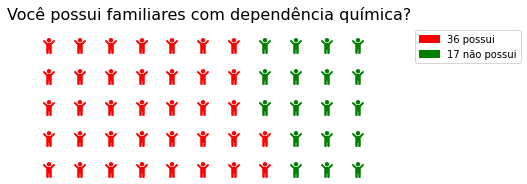

In [39]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=11,
                values={'36 possui': 36,
                        '17 não possui': 17}, 
                colors= ('red','green'),                
                icons= 'child', icon_size=16,                     
                legend={'loc': 'upper left','bbox_to_anchor': (1.1, 1)}
                )
 
fig.set_tight_layout(False)
plt.title('Você possui familiares com dependência química?', fontsize=16)
plt.savefig('familias com dependentes', format='png')
plt.show()

2.Qual o seu grau de parentesco com o dependente químico?

In [69]:
df3['Qual o seu grau de parentesco com o dependente químico?'].value_counts()

Irmão(ã)    12
Primo(a)     7
Filho(a)     5
Tio(a)       4
Mãe/Pai      2
Cônjuge      2
Amigo        1
Avô          1
Sobrinha     1
Cunhado      1
Name: Qual o seu grau de parentesco com o dependente químico?, dtype: int64

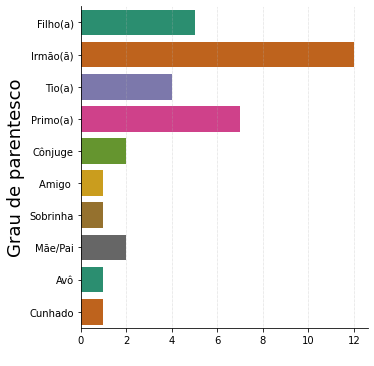

In [40]:
sns.catplot(y='Qual o seu grau de parentesco com o dependente químico?', data=df3, kind='count', palette='Dark2')
plt.ylabel('Grau de parentesco', fontsize=18)
plt.xlabel(' ')
plt.grid(False, linestyle='dotted', linewidth=0.5, axis='x')

3.Atualmente você é responsável pelo dependente químico?

In [41]:
df3['Atualmente você é responsável pelo dependente químico?'].value_counts()

Não    24
Sim    12
Name: Atualmente você é responsável pelo dependente químico?, dtype: int64

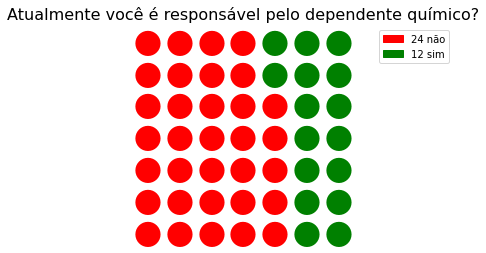

In [42]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=7,
                columns=7,
                values={'24 não': 24,
                        '12 sim': 12}, 
                colors= ('red','green'),
                icons= 'circle', icon_size=26,                     
                legend={'loc': 'upper left','bbox_to_anchor': (1.1, 1)}
                )
 
fig.set_tight_layout(False)
plt.title('Atualmente você é responsável pelo dependente químico?', fontsize=16)
plt.show()

4.Qual o gênero do dependente químico?

In [43]:
df3['Qual o gênero do dependente químico? '].value_counts()

Masculino    31
Feminino      4
Outros        1
Name: Qual o gênero do dependente químico? , dtype: int64

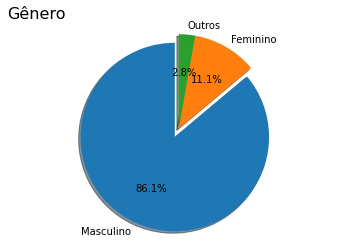

In [44]:
labels = 'Masculino', 'Feminino', 'Outros'
sizes = [31, 4, 1]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)  # gráfico de pizza
ax1.axis('equal')   # Proporção de aspecto igual garante que a torta seja desenhada como um círculo.
plt.title('Gênero', fontsize=16, loc='left')
plt.show()

5.Qual a cor do dependente químico?




In [45]:
df3['Qual a cor do dependente químico? '].value_counts()

Branca    15
Parda     12
Preta      9
Name: Qual a cor do dependente químico? , dtype: int64

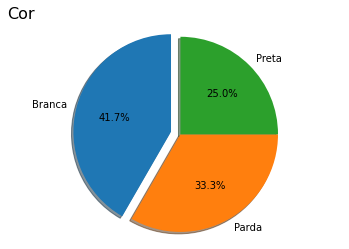

In [46]:
labels = 'Branca', 'Parda', 'Preta'
sizes = [15, 12, 9]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)  # gráfico de pizza
ax1.axis('equal')   # Proporção de aspecto igual garante que a torta seja desenhada como um círculo.
plt.title('Cor', fontsize=16, loc='left')
plt.show()

6.Qual a idade do dependente químico?

In [70]:
df3['Qual a idade do dependente químico?'].value_counts()

26 a 33 anos       13
42 a 49 anos       10
18 a 25 anos        6
50 anos ou mais     5
34 a 41 anos        2
Name: Qual a idade do dependente químico?, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, ' ')

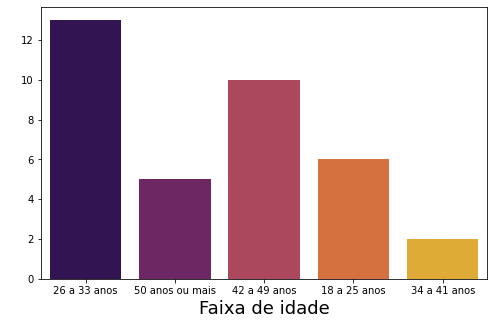

In [47]:
plt.rcParams['figure.figsize']=(8,5)

sns.countplot(df3['Qual a idade do dependente químico?'], palette='inferno')
plt.xlabel('Faixa de idade', fontsize=18)
plt.ylabel(' ')


7.Qual é a renda familiar?

In [48]:
df3['Qual é a renda familiar? '].value_counts()

De 1 a 3 salários mínimos      19
Até 1 salário mínimo           15
Acima de 4 salários mínimos     2
Name: Qual é a renda familiar? , dtype: int64

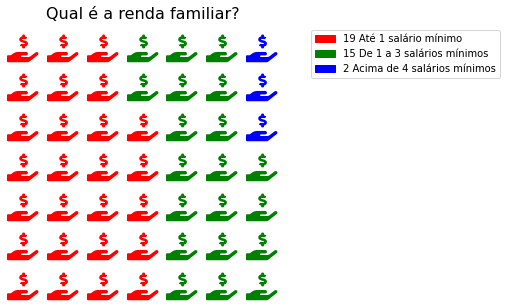

In [49]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=7,
                columns=7,
                values={'19 Até 1 salário mínimo': 19,
                        '15 De 1 a 3 salários mínimos': 15,
                        '2 Acima de 4 salários mínimos':2}, 
                colors= ('red','green', 'blue'),
                icons= 'hand-holding-usd', icon_size=28,                     
                legend={'loc': 'upper left','bbox_to_anchor': (1.1, 1)}
                )
 
fig.set_tight_layout(False)
plt.title('Qual é a renda familiar?', fontsize=16)
plt.show()

8.Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.

In [71]:
df3['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].value_counts()

13    5
0     3
15    2
14    2
20    2
16    2
18    2
23    2
40    2
18    1
17    1
19    1
15    1
14    1
28    1
39    1
26    1
35    1
16    1
30    1
12    1
10    1
45    1
Name: Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade., dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, ' ')

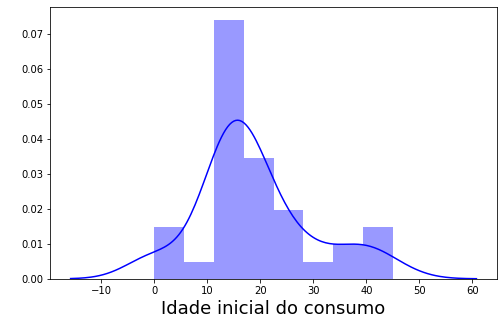

In [50]:
sns.distplot(df3['Em qual idade você descobriu que o seu familiar fazia uso de drogas? Digite somente a idade.'].dropna(), color='blue')
plt.xlabel('Idade inicial do consumo', fontsize='18')
plt.ylabel(' ')

9.Há outros casos de dependência química anteriores a esse na família?

In [51]:
df3['Há outros casos  de dependência química anteriores a esse na família?'].value_counts()

Sim    22
Não    14
Name: Há outros casos  de dependência química anteriores a esse na família?, dtype: int64

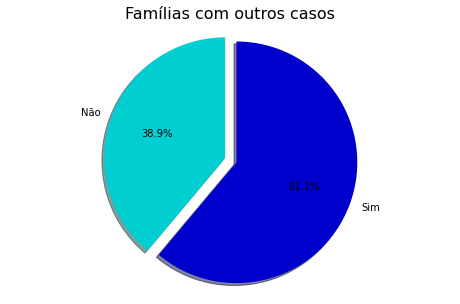

In [52]:
labels = 'Não', 'Sim'
sizes = [14, 22]
explode = (0.1, 0)
c= ['#00CED1','#0000CD']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=c)  # gráfico de pizza
ax1.axis('equal')   # Proporção de aspecto igual garante que a torta seja desenhada como um círculo.

plt.title('Famílias com outros casos', fontsize=16)
plt.show()

10.Seu familiar está empregado?

In [53]:
df2['Seu familiar está empregado?'].value_counts()

Não    26
Sim    10
Name: Seu familiar está empregado?, dtype: int64

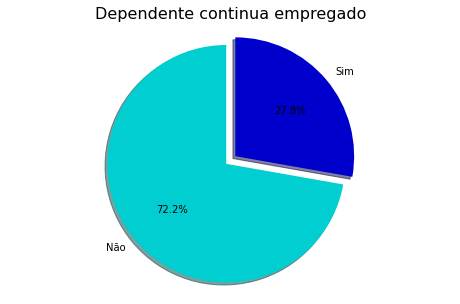

In [54]:
labels = 'Não', 'Sim'
sizes = [26, 10]
explode = (0.1, 0)
c= ['#00CED1','#0000CD']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=c)  # gráfico de pizza
ax1.axis('equal')   # Proporção de aspecto igual garante que a torta seja desenhada como um círculo.

plt.title('Dependente continua empregado', fontsize=16)
plt.show()

11.Se não estiver empregado, perdeu ou não conseguiu arrumar emprego por conta da dependência? (se estiver empregado não responder)

In [55]:
df3['Se não estiver empregado, perdeu ou não conseguiu arrumar emprego por conta da dependência? (se estiver empregado não responder)'].value_counts()

Sim    20
Não     8
Name: Se não estiver empregado, perdeu ou não conseguiu arrumar emprego por conta da dependência? (se estiver empregado não responder), dtype: int64

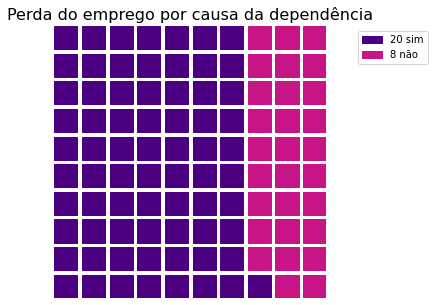

In [56]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=10,
                columns=10,
                values={'20 sim': 20,
                        '8 não': 8}, 
                colors= ('#4B0082','#C71585'),
                #icons= 'circle', icon_size=26,                     
                legend={'loc': 'upper left','bbox_to_anchor': (1.1, 1)}
                )
 
fig.set_tight_layout(False)
plt.title('Perda do emprego por causa da dependência', fontsize=16)
plt.show()

12.Se estiver desempregado, há quanto tempo está nessa situação, sem emprego? ( se estiver empregado não responder)

In [57]:
df3['Se estiver desempregado, há quanto tempo está nessa situação, sem emprego? ( se estiver empregado não responder)'].value_counts()

Acima de 2 anos    11
De 1 a 2 anos      10
Menos de 1 ano      9
Name: Se estiver desempregado, há quanto tempo está nessa situação, sem emprego? ( se estiver empregado não responder), dtype: int64

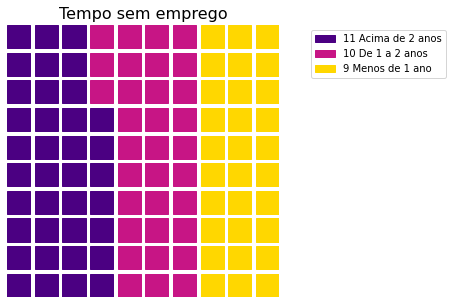

In [72]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=10,
                columns=10,
                values={'11 Acima de 2 anos': 11,
                        '10 De 1 a 2 anos': 10,
                        '9 Menos de 1 ano': 9}, 
                colors= ('#4B0082','#C71585','#FFD700'),
                #icons= 'circle', icon_size=26,                     
                legend={'loc': 'upper left','bbox_to_anchor': (1.1, 1)}
                )
 
fig.set_tight_layout(False)
plt.title('Tempo sem emprego', fontsize=16)
plt.show()

13.Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)

In [59]:
df3['Na sua opinião, quais fatores contribuíram para seu familiar começar o uso de drogas? (escolha quantas opções quiser)'].value_counts()


Amigos                                                                       10
Decepção amorosa                                                              5
Amigos;Baixa auto-estima                                                      2
Conflitos com os pais;Amigos;Depressão / Ansiedade                            2
Depressão / Ansiedade                                                         2
Decepção amorosa;Depressão / Ansiedade;Baixa auto-estima                      2
Baixa auto-estima                                                             2
Começou a fazer o uso de drogas depois que minha mãe adoeceu.                 1
Falta de emprego                                                              1
Baixa auto-estima;Problemas de moral ou caráter                               1
Decepção amorosa;Falta de emprego;Depressão / Ansiedade;Baixa auto-estima     1
Conflitos com os pais;Depressão / Ansiedade                                   1
Conflitos com os pais;Amigos;Baixa auto-

In [60]:
fatores = {'fator':['amigos','decepcao_amorosa','depressao_ansiedade','baixa_auto_estima','conflito_pais','desemprego','carater','doença_de_familiar','influencia_familiar'],
           'respostas': [15,11,11,10,5,3,1,1,1]}

In [61]:
ss = pd.DataFrame(data=fatores)

Text(0.5, 0, ' ')

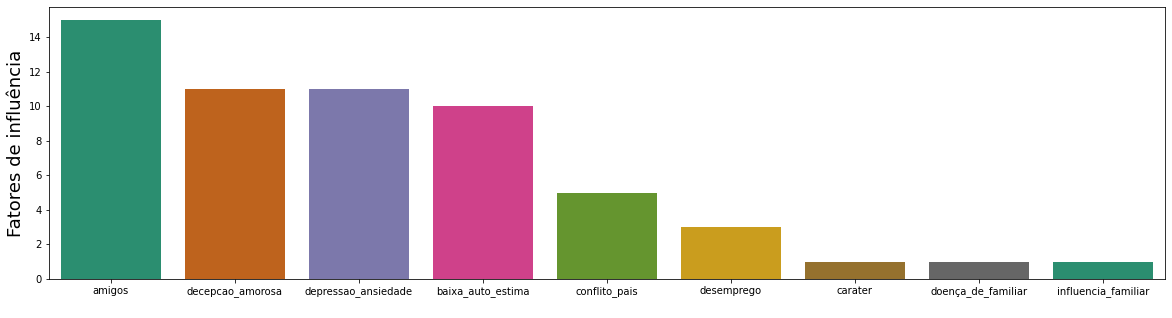

In [62]:
plt.rcParams['figure.figsize']=(20,5)

sns.barplot(x='fator', y='respostas', data=ss, palette='Dark2')
plt.ylabel('Fatores de influência' ,fontsize=18)
plt.xlabel(' ')
#plt.grid(False, linestyle='dotted', linewidth=0.5, axis='x')

14.Você tem algum auxilio do poder público para o tratamento do seu familiar? (atendimento do serviço social, auxilio da previdência ou algum outro beneficio)

In [63]:
df3['Você tem algum auxilio do poder público para o tratamento do seu familiar? (atendimento do serviço social, auxilio da previdência ou algum outro beneficio)'].value_counts()

Não    31
Sim     5
Name: Você tem algum auxilio do poder público para o tratamento do seu familiar? (atendimento do serviço social, auxilio da previdência ou algum outro beneficio), dtype: int64

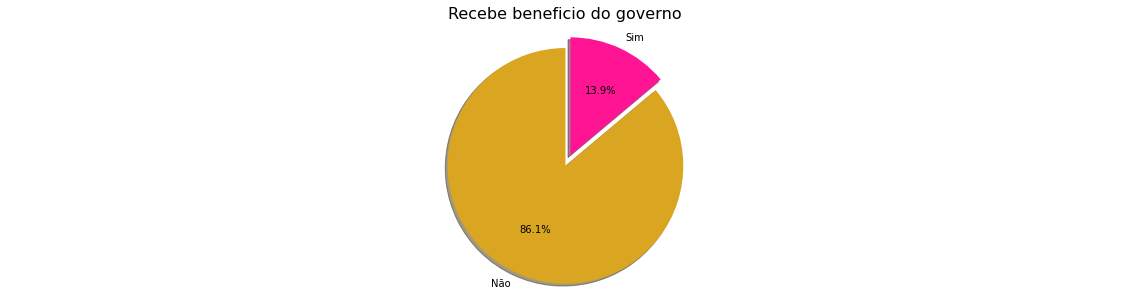

In [64]:
labels = 'Não', 'Sim'
sizes = [31, 5]
explode = (0.1, 0)
c= ['#DAA520','#FF1493']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=c)  # gráfico de pizza
ax1.axis('equal')   # Proporção de aspecto igual garante que a torta seja desenhada como um círculo.

plt.title('Recebe beneficio do governo', fontsize=16)
plt.show()

15.Você acredita na recuperação do seu familiar?



In [65]:
df3['Você acredita na recuperação do seu familiar? '].value_counts()

Sim    35
Não     1
Name: Você acredita na recuperação do seu familiar? , dtype: int64

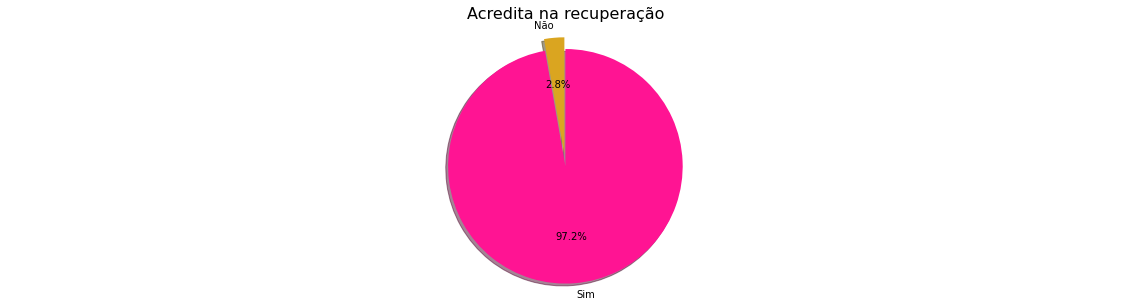

In [66]:
labels = 'Não', 'Sim'
sizes = [1, 35]
explode = (0.1, 0)
c= ['#DAA520','#FF1493']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=c)  # gráfico de pizza
ax1.axis('equal')   # Proporção de aspecto igual garante que a torta seja desenhada como um círculo.

plt.title('Acredita na recuperação', fontsize=16)
plt.show()

16.Seu familiar já passou por algum tratamento para a dependência química?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, ' ')

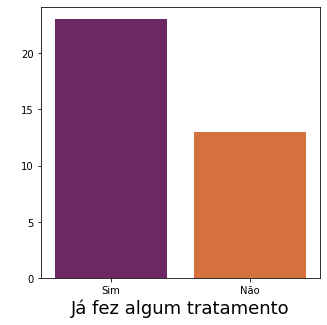

In [67]:
plt.rcParams['figure.figsize']=(5,5)

sns.countplot(df3['Seu familiar já passou por algum tratamento para a dependência química?'], palette='inferno')
plt.xlabel('Já fez algum tratamento', fontsize=18)
plt.ylabel(' ')


17.Seu familiar se recuperou e não voltou à dependência?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, ' ')

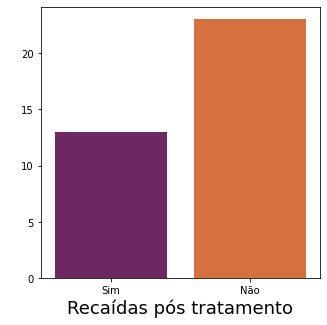

In [68]:
plt.rcParams['figure.figsize']=(5,5)

sns.countplot(df3['Seu familiar se recuperou e não voltou à dependência? '], palette='inferno')
plt.xlabel('Recaídas pós tratamento', fontsize=18)
plt.ylabel(' ')

Os gráficos foram usados na eleboração de um relatório de fins academicos, que por fatores de aprovação de banca não serão elencados aqui. 

Elaboração das perguntas: Edimar Ribeiro de Moura

Gráficos: Cristina Pineda Ribeiro de Moura
